In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import wandb
from wandb.keras import WandbCallback
from datetime import datetime

In [22]:
wandb.init(project="Weather temp History")

epoch,▁▁▂▂▂▃▃▃▄▄▅▅▅▆▆▆▇▇▇█▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
loss,█▇▇▄▃▅▃▄▃▄▃▃▃▃▃▄▁▃▃▁▁▃▃▂▂▃▂▅▃▃▂▃▂▂▂▂▆▁▂▁
epoch,349
loss,3.05331


In [3]:
data = pd.read_csv('weatherHistory.csv')
data = data[["Formatted Date", "Temperature (C)"]]
data

,Formatted Date,Temperature (C)
0,2006-04-01 00:00:00.000 +0200,9.472222
1,2006-04-01 01:00:00.000 +0200,9.355556
2,2006-04-01 02:00:00.000 +0200,9.377778
3,2006-04-01 03:00:00.000 +0200,8.288889
4,2006-04-01 04:00:00.000 +0200,8.755556
...,...,...
96448,2016-09-09 19:00:00.000 +0200,26.016667
96449,2016-09-09 20:00:00.000 +0200,24.583333
96450,2016-09-09 21:00:00.000 +0200,22.038889
96451,2016-09-09 22:00:00.000 +0200,21.522222


In [4]:
data["Formatted Date"] = pd.to_datetime(data["Formatted Date"], utc=True)
data["Year"] = data["Formatted Date"].dt.year
data["DayOfYear"] = data["Formatted Date"].dt.dayofyear

data.head()

,Formatted Date,Temperature (C),Year,DayOfYear
0,2006-03-31 22:00:00+00:00,9.472222,2006,90
1,2006-03-31 23:00:00+00:00,9.355556,2006,90
2,2006-04-01 00:00:00+00:00,9.377778,2006,91
3,2006-04-01 01:00:00+00:00,8.288889,2006,91
4,2006-04-01 02:00:00+00:00,8.755556,2006,91


In [5]:
# data["Formatted Date"] = pd.to_datetime(data["Formatted Date"])
# data["Year"] = data["Formatted Date"].map(lambda date: date.year)
# data["DayOfYear"] = data["Formatted Date"].map(lambda date: int(format(datetime(date.year, date.month, date.day), "%j")))

# data.head()

In [6]:
target_data = data.groupby(["Year", "DayOfYear"])["Temperature (C)"].mean().reset_index()
target_data

,Year,DayOfYear,Temperature (C)
0,2005,365,0.577778
1,2006,1,4.075000
2,2006,2,5.263194
3,2006,3,2.340509
4,2006,4,2.251852
...,...,...,...
4014,2016,362,0.278009
4015,2016,363,0.222222
4016,2016,364,0.167824
4017,2016,365,0.117593


In [7]:
X = target_data["DayOfYear"].values
X = X.reshape(-1, 1)
X.shape

(4019, 1)

In [8]:
Y = target_data["Temperature (C)"].values
Y = Y.reshape(-1, 1)
Y.shape

(4019, 1)

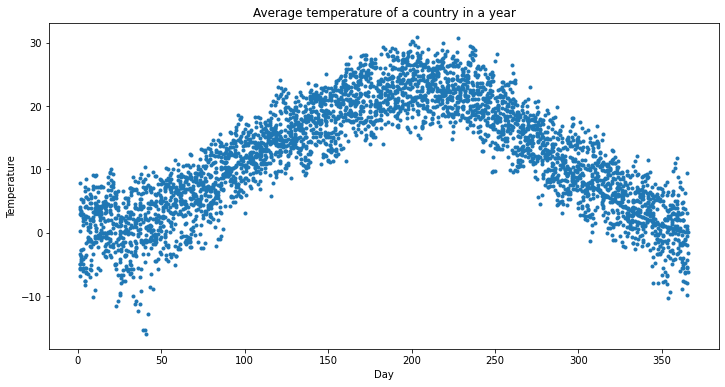

In [9]:
plt.figure(figsize=(12, 6))
plt.scatter(X, Y, marker=".")
plt.title("Average temperature of a country in a year")
plt.xlabel("Day")
plt.ylabel("Temperature")
plt.show()

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=True)

### Model

In [11]:
model = tf.keras.models.Sequential([
    Dense(512, input_dim=1, activation="relu"),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(1, activation="linear")
])

In [12]:
config = wandb.config
config.learning_rate = 0.01

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=config.learning_rate),
              loss=tf.keras.losses.MeanAbsoluteError())

In [18]:
model.fit(X_train, Y_train, epochs=350, callbacks=[WandbCallback()])

Epoch 1/350
95/95 [==============================] - 0s 1ms/step - loss: 3.0776
Epoch 2/350
95/95 [==============================] - 0s 985us/step - loss: 3.0411
Epoch 3/350
95/95 [==============================] - 0s 1ms/step - loss: 3.0857
Epoch 4/350
95/95 [==============================] - 0s 1ms/step - loss: 3.0644
Epoch 5/350
95/95 [==============================] - 0s 1ms/step - loss: 3.1004
Epoch 6/350
95/95 [==============================] - 0s 1ms/step - loss: 3.0430
Epoch 7/350
95/95 [==============================] - 0s 985us/step - loss: 3.1820
Epoch 8/350
95/95 [==============================] - 0s 1ms/step - loss: 3.1599
Epoch 9/350
95/95 [==============================] - 0s 1ms/step - loss: 3.0681
Epoch 10/350
95/95 [==============================] - 0s 1ms/step - loss: 3.0216
Epoch 11/350
95/95 [==============================] - 0s 1ms/step - loss: 3.1042
Epoch 12/350
95/95 [==============================] - 0s 996us/step - loss: 3.0674
Epoch 13/350
95/95 [===========

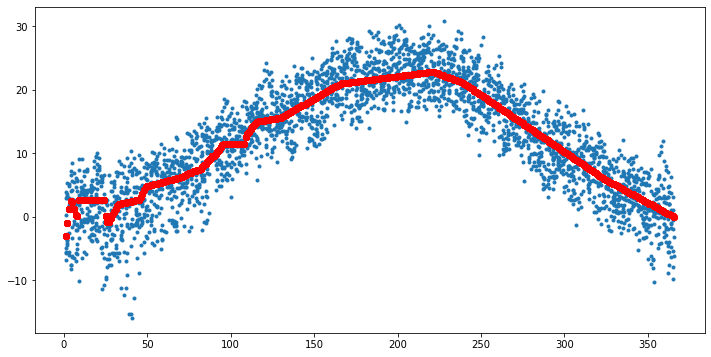

In [19]:
Y_pred = model.predict(X_train)
plt.figure(figsize=(12, 6))
plt.scatter(X_train, Y_train, marker=".")
plt.plot(X_train, Y_pred, "o", c='r')

In [20]:
model.evaluate(X_test, Y_test)

32/32 [==============================] - 0s 694us/step - loss: 2.9569


2.956857204437256

In [21]:
my_day = np.array([[200]])
model.predict(my_day)

array([[22.10786]], dtype=float32)